# Numerical Variable analysis

Helpful for EDA

# 1)- Importing key modules

In [1]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# first install: pip install version_information
%reload_ext version_information
%version_information math, numpy, pandas,matplotlib

Software versions
Python 3.6.5 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.4.0
OS Windows 10 10.0.18362 SP0
math The 'math' distribution was not found and is required by the application
numpy 1.16.0
pandas 0.24.1
matplotlib 3.0.2
Sat Oct 05 21:29:33 2019 W. Europe Daylight Time

# 2)- Loading data file

In [4]:
# taking 1000 random samples out of bug dataset

data = pd.read_csv('loan.csv').sample(10000, random_state=44) 

In [5]:
data.shape

(20000, 145)

In [6]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
70642,NaN,NaN,12000,12000,12000.0,36 months,10.33,389.07,B,B1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
490788,NaN,NaN,20000,20000,20000.0,60 months,11.99,444.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2081591,NaN,NaN,35000,35000,35000.0,60 months,18.25,893.54,D,D3,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
900431,NaN,NaN,8000,8000,8000.0,36 months,7.99,250.66,A,A5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
781582,NaN,NaN,17000,17000,17000.0,36 months,9.16,541.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.to_csv('loan_1000.csv', index=False)

In [8]:
cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status','open_il_12m']

In [30]:
data = pd.read_csv('loan_1000.csv', usecols=cols)  
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
0,12000,10.33,115000.0,Current,10.0,2.0
1,20000,11.99,19200.0,Current,9.0,0.0
2,35000,18.25,153619.0,Charged Off,27.0,NaN
3,8000,7.99,67000.0,Fully Paid,10.0,1.0
4,17000,9.16,50000.0,Fully Paid,9.0,0.0


In [31]:
data.shape

(20000, 6)

We have selected few selective features to make analysis easier. In EDA excercise, it will be full dataset

In [32]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(data)
table_dtype

,Data Type
loan_amnt,int64
int_rate,float64
annual_inc,float64
open_acc,float64
open_il_12m,float64
loan_status,object


Data type with int and float are numerical while data type with object is categorical variable

# 3)- Analysing Continuous Variables

In [33]:
data.loan_amnt.unique()

array([12000, 20000, 35000, ..., 27350,  3350, 21775], dtype=int64)

 this is the amount of money requested by the borrower in US dollars

Text(0, 0.5, 'Number of Loans')

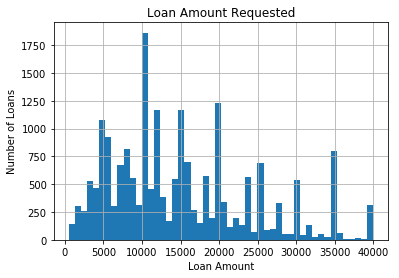

In [34]:
# distribution of the variable

fig = data.loan_amnt.hist(bins=50)
fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans')

The values of the variable vary across the entire range of the variable. This is characteristic of continuous variables.

The taller bars correspond to loan sizes of 10000, 15000, 20000, and 35000. There are more loans disbursed for those loan amount values. This indicates that most people tend to ask for these loan amounts. Likely, these particular loan amounts are pre-determined and offered as such in the Lending Club website.

Less frequent loan values, like 23,000 or 33,000 could be requested by people who require a specific amount of money for a definite purpose.

In [35]:
#variable interest rate, which is charged by lending club to the borrowers
data.int_rate.unique()

array([10.33, 11.99, 18.25,  7.99,  9.16,  8.39, 16.91,  9.92, 11.39,
        7.59, 15.31, 16.55,  9.93, 12.99,  7.26, 11.06, 10.99, 11.49,
       12.29,  9.17,  8.46,  6.49, 12.62,  8.19,  7.49, 15.59, 11.44,
       13.99, 17.97, 10.08, 13.67, 13.49, 13.59, 27.79, 15.96, 15.99,
       13.35,  6.89, 19.92, 20.39,  9.99, 15.61,  6.67,  7.89, 18.99,
       21.85, 12.69, 21.98, 11.47, 15.05, 12.12,  9.67,  6.11, 18.49,
       16.29,  7.97, 14.09, 14.65, 14.33, 10.91, 16.01, 16.78, 12.73,
       17.99, 22.2 ,  8.24, 10.56, 22.99, 14.49, 15.1 ,  6.62, 14.42,
        5.32, 14.08, 14.99,  8.81, 21.99,  5.31, 12.39,  9.71, 11.55,
        6.99, 15.49, 22.95, 26.3 , 11.03,  7.07,  7.21, 17.57, 22.35,
       23.88, 24.49, 30.17, 16.02, 20.75, 10.16, 10.42,  9.43, 25.83,
        7.84, 18.94,  9.44, 19.99, 15.04, 16.99, 17.27,  9.49, 24.08,
        8.9 , 30.99, 11.48, 14.72, 17.86,  7.34, 16.14,  8.99, 22.4 ,
        6.83,  5.93, 11.98,  8.08, 18.06, 13.56, 14.46, 10.15, 11.22,
       21.  , 21.49,

Text(0, 0.5, 'Number of Loans')

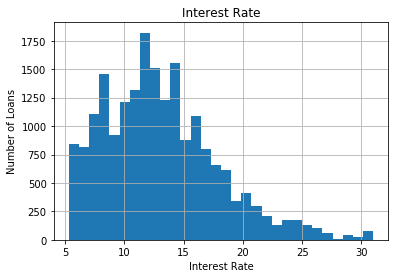

In [36]:
# distribution of the variable

fig = data.int_rate.hist(bins=30)
fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans')

Interest rate at 12 and 14 level are highest number of loan taking whereas 27 seems to have low number of loans 

In [37]:
data.annual_inc.unique()

array([115000.,  19200., 153619., ..., 120750.,  16955., 335000.])

Text(0, 0.5, 'Number of Customers')

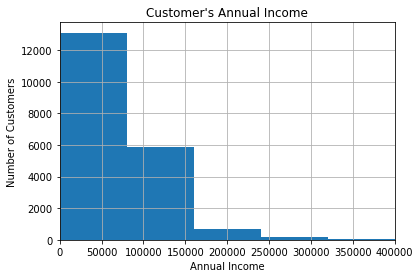

In [38]:
fig = data.annual_inc.hist(bins=100)
fig.set_xlim(0, 400000)
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

The majority of salaries are concentrated towards values in the range 30-70 k, with only a few customers earning higher salaries.

Higher salary earners are few 

# Analysis of Discrete Variables
Let's explore the variable "Number of open credit lines in the borrower's credit file" (open_acc in the dataset). This is, the total number of credit items (for example, credit cards, car loans, mortgages, etc) that is known for that borrower. By definition it is a discrete variable, because a borrower can have 1 credit card, but not 3.5 credit cards.

In [39]:
data.open_acc.dropna().unique() # avoiding missing values

array([10.,  9., 27., 12.,  5., 19., 11., 14.,  8., 24., 15.,  7., 26.,
       22., 18., 21., 16., 17., 25., 23.,  4.,  6., 30.,  3., 31., 13.,
       28., 20., 29., 37.,  1., 35., 36., 44.,  2., 34., 39., 33., 32.,
       38., 40., 47., 46., 48., 43.,  0., 56., 42., 58., 62., 41., 54.,
       52.])

Text(0, 0.5, 'Number of Customers')

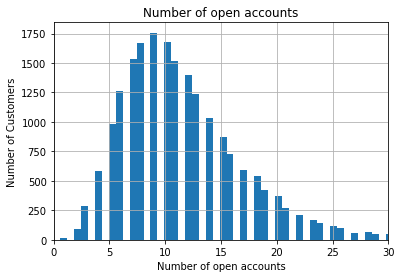

In [40]:
# distribution of the variable

fig = data.open_acc.hist(bins=100)
fig.set_xlim(0, 30)
fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers')

Histograms of discrete variables have this typical broken shape, as not all the values within the variable range are present in the variable.

Customer may have 8 open credit lines in the borrower's credit file not 8.5

In [41]:
# Number of installment accounts opened in past 12 months (open_il_12m in the dataset)
data.open_il_12m.unique()

array([ 2.,  0., nan,  1.,  3.,  5.,  4.,  6.,  7.,  9.])

In [42]:
data.open_il_12m.dropna().unique()

array([2., 0., 1., 3., 5., 4., 6., 7., 9.])

Text(0, 0.5, 'Number of Borrowers')

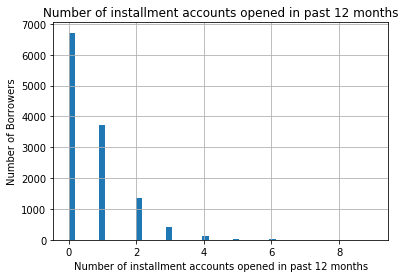

In [43]:
# distribution of the variable

fig = data.open_il_12m.hist(bins=50)
fig.set_title('Number of installment accounts opened in past 12 months')
fig.set_xlabel('Number of installment accounts opened in past 12 months')
fig.set_ylabel('Number of Borrowers')

The majority of the borrowers have none or 1 installment account, with only a few borrowers having more than 2.

# Categorical variable


In [44]:
#values of the variable loan status

data.loan_status.unique()

array(['Current', 'Charged Off', 'Fully Paid',
       'Does not meet the credit policy. Status:Fully Paid',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

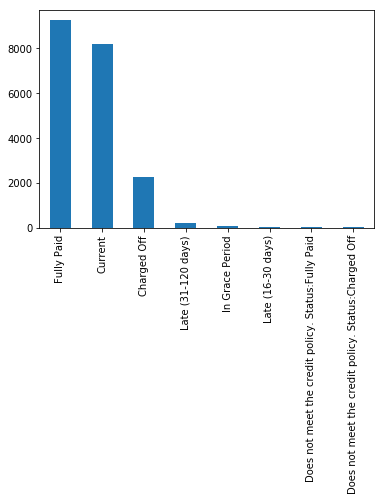

In [45]:
data.loan_status.value_counts().plot(kind='bar')

### convert to binary variable
The variable takes the values 0 where the loans are ok and being re-paid regularly, or 1, when the borrower has confirmed that will not be able to re-pay the borrowed amount.

In [46]:
data['defaulted'] = np.where(data.loan_status.isin(['Default']), 1, 0)

In [47]:
data.defaulted.unique()

array([0], dtype=int64)

In [49]:
# the new variable takes the value 1 for loans that are defaulted

data[data.loan_status.isin(['Default'])].head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m,defaulted


We have no values that are of defaulted in selected dataset

Text(0, 0.5, 'Number of Loans')

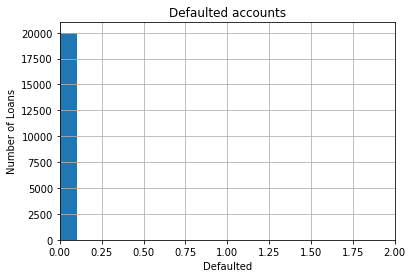

In [50]:
# binary variables do not make a lot of sense

fig = data.defaulted.hist()
fig.set_xlim(0, 2)
fig.set_title('Defaulted accounts')
fig.set_xlabel('Defaulted')
fig.set_ylabel('Number of Loans')

In [51]:
data['defaulted'].value_counts()

0    20000
Name: defaulted, dtype: int64

We have all credits paid in time in this sample. More analysis can be made on full dataset